In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import rasterio
from rasterio.mask import mask
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import math
import geopandas as gpd
import pandas as pd
import sqlite3

In [2]:
#Q1
counties = gpd.read_file('counties.geojson')
len(counties)

72

<Axes: >

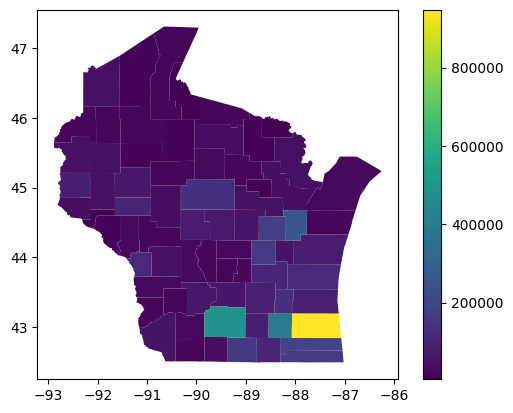

In [3]:
#Q2
counties.plot(column = 'POP100', legend = True)

In [4]:
conn = sqlite3.connect("counties_tracts.db")
arealandDF = pd.read_sql("""SELECT * FROM counties""", conn)
counties = pd.merge(counties, arealandDF[["NAME", "AREALAND"]], on="NAME", how="left")
train, test = train_test_split(counties, test_size=0.25, random_state=200)
counties

,NAME,POP100,geometry,AREALAND
0,Racine County,195408,"POLYGON ((-88.07073 42.66976, -88.06897 42.669...",861533739
1,Clark County,34690,"POLYGON ((-90.55875 44.42221, -90.53398 44.422...",3133378070
2,Wood County,74749,"POLYGON ((-89.72464 44.33712, -89.72460 44.338...",2054044751
3,Rusk County,14755,"POLYGON ((-90.92517 45.37935, -90.92515 45.379...",2366092584
4,Ozaukee County,86395,"POLYGON ((-87.89269 43.19202, -87.89265 43.192...",603514413
...,...,...,...,...
67,Washburn County,15911,"POLYGON ((-91.55065 46.07034, -91.55065 46.070...",2064515991
68,Monroe County,44673,"POLYGON ((-90.55246 43.72565, -90.55096 43.725...",2333270295
69,Richland County,18021,"POLYGON ((-90.31107 43.55399, -90.31108 43.553...",1518120276
70,Price County,14159,"POLYGON ((-90.04485 45.81765, -90.04440 45.830...",3248866440


In [5]:
#Q3
test["NAME"].tolist()

['Lafayette County',
 'Ashland County',
 'Green County',
 'Rock County',
 'Buffalo County',
 'Kenosha County',
 'Bayfield County',
 'Brown County',
 'Eau Claire County',
 'Iowa County',
 'Waupaca County',
 'Douglas County',
 'Oconto County',
 'Wood County',
 'Juneau County',
 'Calumet County',
 'Sawyer County',
 'Portage County']

In [6]:
#Q4
model = LinearRegression()
model.fit(train[["AREALAND"]], train["POP100"])
score = model.score(test[["AREALAND"]], test["POP100"])
score

0.17862191819115214

In [7]:
#Q5
area = 400*2.59*1e6
predictedPop = model.coef_[0]*area + model.intercept_
predictedPop

113576.48014827626

In [8]:
conn = sqlite3.connect("counties_tracts.db")
hu100DF = pd.read_sql("""
  SELECT counties.NAME, tracts.COUNTY, SUM(HU100) AS HU100
  FROM tracts INNER JOIN counties 
  ON tracts.COUNTY = counties.COUNTY
  GROUP BY counties.COUNTY""", conn)
hu100DF
counties = pd.merge(counties, hu100DF[["NAME", "HU100"]], on="NAME", how="left")
train, test = train_test_split(counties, test_size=0.25, random_state=200)
counties

,NAME,POP100,geometry,AREALAND,HU100
0,Racine County,195408,"POLYGON ((-88.07073 42.66976, -88.06897 42.669...",861533739,82164
1,Clark County,34690,"POLYGON ((-90.55875 44.42221, -90.53398 44.422...",3133378070,15076
2,Wood County,74749,"POLYGON ((-89.72464 44.33712, -89.72460 44.338...",2054044751,34088
3,Rusk County,14755,"POLYGON ((-90.92517 45.37935, -90.92515 45.379...",2366092584,8883
4,Ozaukee County,86395,"POLYGON ((-87.89269 43.19202, -87.89265 43.192...",603514413,36267
...,...,...,...,...,...
67,Washburn County,15911,"POLYGON ((-91.55065 46.07034, -91.55065 46.070...",2064515991,12979
68,Monroe County,44673,"POLYGON ((-90.55246 43.72565, -90.55096 43.725...",2333270295,19204
69,Richland County,18021,"POLYGON ((-90.31107 43.55399, -90.31108 43.553...",1518120276,8868
70,Price County,14159,"POLYGON ((-90.04485 45.81765, -90.04440 45.830...",3248866440,11120


In [9]:
#Q6
test["NAME"].tolist()

['Lafayette County',
 'Ashland County',
 'Green County',
 'Rock County',
 'Buffalo County',
 'Kenosha County',
 'Bayfield County',
 'Brown County',
 'Eau Claire County',
 'Iowa County',
 'Waupaca County',
 'Douglas County',
 'Oconto County',
 'Wood County',
 'Juneau County',
 'Calumet County',
 'Sawyer County',
 'Portage County']

In [10]:
#Q7
test[["NAME", "HU100"]].set_index('NAME').to_dict()['HU100']

{'Lafayette County': 7230,
 'Ashland County': 9656,
 'Green County': 15856,
 'Rock County': 68422,
 'Buffalo County': 6664,
 'Kenosha County': 69288,
 'Bayfield County': 12999,
 'Brown County': 104371,
 'Eau Claire County': 42151,
 'Iowa County': 10719,
 'Waupaca County': 25396,
 'Douglas County': 22825,
 'Oconto County': 23537,
 'Wood County': 34088,
 'Juneau County': 14669,
 'Calumet County': 19695,
 'Sawyer County': 15975,
 'Portage County': 30054}

In [11]:
#Q8
xcolmn = ["HU100"]
ycolmn = ["POP100"]
m1 = LinearRegression()
scores = cross_val_score(m1, train[xcolmn], train[ycolmn])
scores.mean()

0.973695022577221

In [12]:
#Q9
var = 0
for score in scores:
    var += (scores.mean() - score)**2
var = var/5
math.sqrt(var)

0.02725373263667933

In [13]:
#Q10
model = LinearRegression()
model.fit(train[["HU100"]], train["POP100"])
answer = "POP100 = " + str(round(model.coef_[0], 2)) + "*HU100 + " + str(round(model.intercept_, 2))
answer

'POP100 = 2.31*HU100 + -5667.82'

In [14]:
#Q11

Text(216022, 488073, 'Dane')

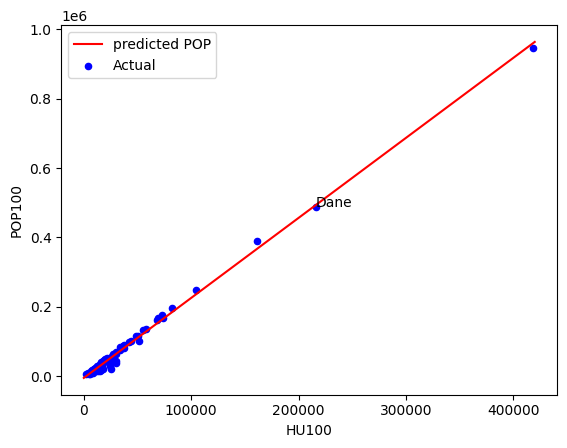

In [15]:
#Q12
test
predict_df = pd.DataFrame({"HU100": range(0, 440000, 20000)})
predict_df["predicted POP"] = model.predict(predict_df)

ax = predict_df.plot.line(x="HU100", y="predicted POP", color="red")
counties.plot.scatter(x="HU100", y="POP100", ax=ax, color="blue", label="Actual")
brownCounty = counties.loc[counties['NAME'] == "Dane County"]
ax.text(brownCounty.iloc[0]["HU100"], brownCounty.iloc[0]["POP100"], "Dane")

In [16]:
#Q13
A = np.array([
    [0,0,5,8,4],
    [1,2,4,0,3],
    [2,4,0,9,2],
    [3,5,2,1,1],
    [0,5,0,1,0]
])
(np.logical_and(A >= 3, A <= 6)).astype(int).sum()

8

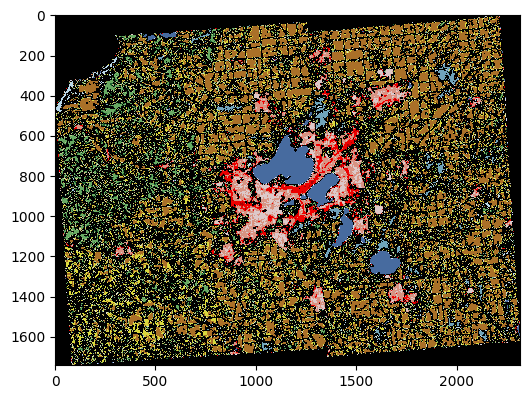

In [17]:
#Q14
c = np.zeros((256,3))
c[0] = [0.00000000000, 0.00000000000, 0.00000000000]
c[11] = [0.27843137255, 0.41960784314, 0.62745098039]
c[12] = [0.81960784314, 0.86666666667, 0.97647058824]
c[21] = [0.86666666667, 0.78823529412, 0.78823529412]
c[22] = [0.84705882353, 0.57647058824, 0.50980392157]
c[23] = [0.92941176471, 0.00000000000, 0.00000000000]
c[24] = [0.66666666667, 0.00000000000, 0.00000000000]
c[31] = [0.69803921569, 0.67843137255, 0.63921568628]
c[41] = [0.40784313726, 0.66666666667, 0.38823529412]
c[42] = [0.10980392157, 0.38823529412, 0.18823529412]
c[43] = [0.70980392157, 0.78823529412, 0.55686274510]
c[51] = [0.64705882353, 0.54901960784, 0.18823529412]
c[52] = [0.80000000000, 0.72941176471, 0.48627450980]
c[71] = [0.88627450980, 0.88627450980, 0.75686274510]
c[72] = [0.78823529412, 0.78823529412, 0.46666666667]
c[73] = [0.60000000000, 0.75686274510, 0.27843137255]
c[74] = [0.46666666667, 0.67843137255, 0.57647058824]
c[81] = [0.85882352941, 0.84705882353, 0.23921568628]
c[82] = [0.66666666667, 0.43921568628, 0.15686274510]
c[90] = [0.72941176471, 0.84705882353, 0.91764705882]
c[95] = [0.43921568628, 0.63921568628, 0.72941176471]
custom_cmap = ListedColormap(c)

land = rasterio.open("zip://./land.zip!/wi.tif")
matrix, _ = mask(land, brownCounty.to_crs(land.crs)["geometry"], crop=True)
matrix = matrix[0]
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(matrix, vmin=0, vmax=255, cmap=custom_cmap)

In [18]:
#Q15
openWater = (matrix == 11).astype(int).sum()
allBrown = (matrix != 0).astype(int).sum()
openWater/allBrown

0.033168915727768894

<Axes: xlabel='Grassland Cells In County', ylabel='POP100'>

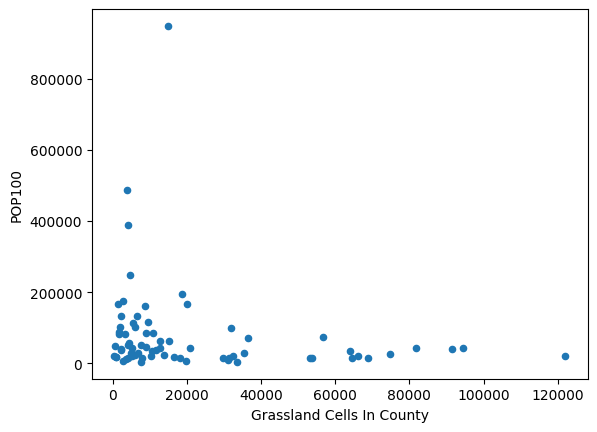

In [19]:
#Q16
land = rasterio.open("zip://../mp6/land.zip!wi.tif")
def getGrasslandCount(name):
    countySeries = counties.loc[counties['NAME'] == name]
    matrix, _ = mask(land, countySeries.to_crs(land.crs)["geometry"], crop=True)
    matrix = matrix[0]
    return (matrix == 71).astype(int).sum()

counties["grassland"] = counties["NAME"].apply(lambda x : getGrasslandCount(x))
counties.plot.scatter("grassland", "POP100", xlabel="Grassland Cells In County")

In [20]:
tracts = gpd.read_file("tracts.shp")

land = rasterio.open("zip://../mp6/land.zip!wi.tif")

land_use = {"open_water": 11,
            "ice_snow": 12,
            "developed_open": 21,
            "developed_low": 22,
            "developed_med": 23,
            "developed_high": 24,
            "barren": 31,
            "deciduous": 41,
            "evergreen": 42,
            "mixed_forest": 43,
            "dwarf_scrub": 51,
            "shrub_scrub": 52,
            "grassland": 71,
            "sedge": 72,
            "lichens": 73,
            "moss": 74,
            "pasture": 81,
            "crops": 82,
            "woody_wetlands": 90,
            "herbacious_wetlands": 95}

for index, row in tracts.iterrows():
    uniqueDF = tracts[tracts['GEOID'] == row['GEOID']]
    matrix, _ = mask(land, uniqueDF.to_crs(land.crs)["geometry"], crop=True)
    matrix = matrix[0]
    for land_type, code in land_use.items():
        count = np.sum((matrix == code))
        tracts.at[index, land_type] = count

<Axes: >

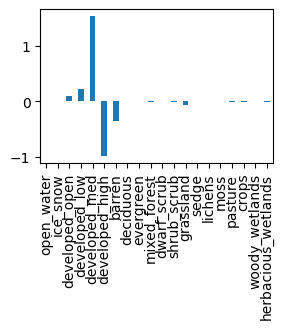

In [21]:
#Q17
train, test = train_test_split(tracts, test_size=0.20, random_state=200)
xcols = list(land_use.keys())
model = LinearRegression()
model.fit(train[xcols], train["POP100"])
pd.Series(model.coef_, index=xcols).plot.bar(figsize=(3, 2))
# The bar plot with each land_use shows that "developed_med", "developed_low", "developed_open", "developed_high", "barren", and "grassland"
# land uses the the greatest effect on the population. This is because these columns are the furthest away from 0 in the graph. I'll be testing if the 4 "developed" columns
# have more of an effect than "barren" and "grassland" columns.
pd.Series(model.coef_, index=xcols).plot.bar(figsize=(3, 2))

In [22]:
#Q18
model1 = LinearRegression()
model2 = LinearRegression()
model1_scores = cross_val_score(model1, train[["developed_med", "developed_low", "developed_open", "developed_high"]], train["POP100"])
model2_scores = cross_val_score(model2, train[["barren", "grassland"]], train["POP100"])
print("Model1_scores: " + str(model1_scores) + ", model1_mean: " + str(model1_scores.mean()) + ", model1_stdev: " + str(model1_scores.std()))
print("Model2_scores: " + str(model2_scores) + ", model1_mean: " + str(model2_scores.mean()) + ", model2_stdev: " + str(model2_scores.std()))
model1.fit(train[["developed_med", "developed_low", "developed_open", "developed_high"]], train["POP100"])
model1.score(test[["developed_med", "developed_low", "developed_open", "developed_high"]], test["POP100"])
# Recommend using model1 since the mean_scores of model1 is much higher than that of model2.
model1.score(test[["developed_med", "developed_low", "developed_open", "developed_high"]], test["POP100"])

Model1_scores: [0.38300216 0.48360595 0.43368666 0.41023418 0.45460323], model1_mean: 0.43302643358928633, model1_stdev: 0.034774118115521044
Model2_scores: [-0.02848081 -0.0203904   0.00276989 -0.04222677  0.00029106], model1_mean: -0.017607405424673827, model2_stdev: 0.01713288469790919


0.37578370479079004